In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [63]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})

In [64]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [65]:
df.head(10)

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
5,2020-10-01,Afternoon,WA,Men,10,25000
6,2020-10-01,Afternoon,WA,Women,3,7500
7,2020-10-01,Afternoon,WA,Seniors,11,27500
8,2020-10-01,Evening,WA,Kids,15,37500
9,2020-10-01,Evening,WA,Men,15,37500


In [66]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500
7559,2020-12-30,Evening,TAS,Seniors,13,32500


In [67]:
df.sample(10)

,Date,Time,State,Group,Unit,Sales
3184,2020-11-08,Afternoon,TAS,Kids,8,20000
7439,2020-12-29,Evening,VIC,Seniors,34,85000
5898,2020-12-11,Afternoon,NT,Women,10,25000
6301,2020-12-16,Morning,WA,Men,10,25000
546,2020-10-07,Afternoon,VIC,Women,36,90000
4277,2020-11-21,Afternoon,TAS,Men,3,7500
5806,2020-12-10,Evening,WA,Women,6,15000
1157,2020-10-14,Afternoon,NSW,Men,25,62500
2991,2020-11-06,Morning,QLD,Seniors,13,32500
4765,2020-11-27,Morning,NSW,Men,32,80000


In [68]:
df.shape

(7560, 6)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [70]:
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [71]:
df.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [72]:
df.isna().any()

,0
Date,False
Time,False
State,False
Group,False
Unit,False
Sales,False


In [73]:
df.isna().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [74]:
df.isnull().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [75]:
num_df = df[['Unit', 'Sales']]
scaler = MinMaxScaler()
normalize_data = scaler.fit_transform(num_df)
normalize_df = pd.DataFrame(normalize_data, columns=num_df.columns)
normalize_df

,Unit,Sales
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


In [76]:
normalize_data[:, [0]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

In [77]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [78]:
date = df['Date']

In [ ]:
df_unit_sales = df.groupby(by='Date').sum()

In [59]:
df_unit_sales.columns

Index(['Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [60]:
df_unit_sales

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1488,3720000
2020-10-02,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1486,3715000
2020-10-03,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1556,3890000
2020-10-04,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1488,3720000
2020-10-05,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1545,3862500
...,...,...,...,...,...
2020-12-26,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1886,4715000
2020-12-27,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1855,4637500
2020-12-28,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1838,4595000


In [61]:
date

,Date
0,2020-10-01
1,2020-10-01
2,2020-10-01
3,2020-10-01
4,2020-10-01
...,...
7555,2020-12-30
7556,2020-12-30
7557,2020-12-30
7558,2020-12-30


In [82]:
df.set_index(df['Date'], inplace=True)

In [86]:
df.drop('Date', axis=1, inplace=True)

In [87]:
df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...
2020-12-30,Afternoon,TAS,Seniors,14,35000
2020-12-30,Evening,TAS,Kids,15,37500
2020-12-30,Evening,TAS,Men,15,37500


In [88]:
df.index

DatetimeIndex(['2020-10-01', '2020-10-01', '2020-10-01', '2020-10-01',
               '2020-10-01', '2020-10-01', '2020-10-01', '2020-10-01',
               '2020-10-01', '2020-10-01',
               ...
               '2020-12-30', '2020-12-30', '2020-12-30', '2020-12-30',
               '2020-12-30', '2020-12-30', '2020-12-30', '2020-12-30',
               '2020-12-30', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=7560, freq=None)

In [89]:
df.index = pd.to_datetime(df.index)

In [92]:
monthly_sales = df.resample('M').sum(numeric_only=True)
monthly_sales

/tmp/ipython-input-1089852605.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum(numeric_only=True)


,Unit,Sales
Date,,
2020-10-31,45716,114290000
2020-11-30,36273,90682500
2020-12-31,54132,135330000


<BarContainer object of 3 artists>

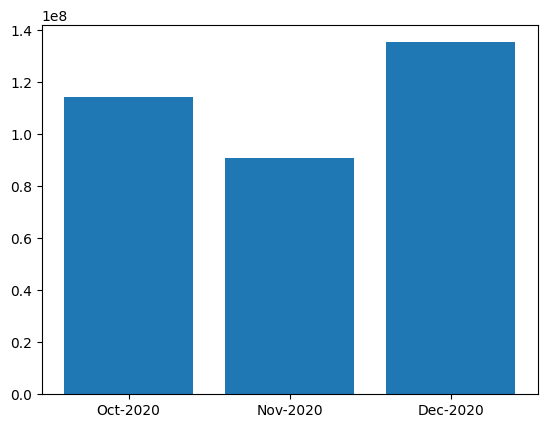

In [94]:
plt.bar(monthly_sales.index.strftime('%b-%Y'), monthly_sales['Sales'])

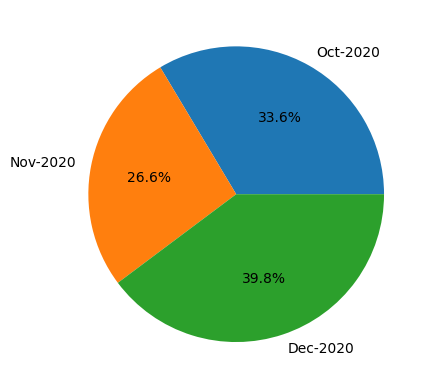

In [96]:
plt.pie(monthly_sales['Sales'], labels=monthly_sales.index.strftime('%b-%Y'), autopct='%1.1f%%')
plt.show()

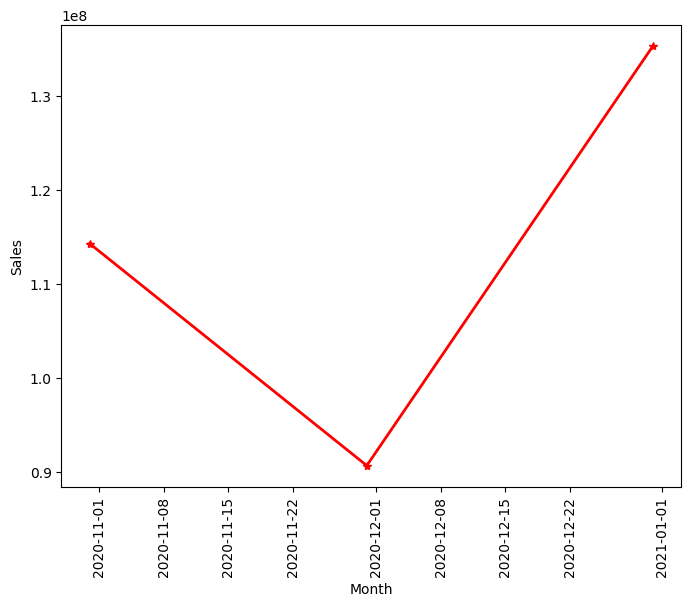

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='*', linestyle='-', color='red', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

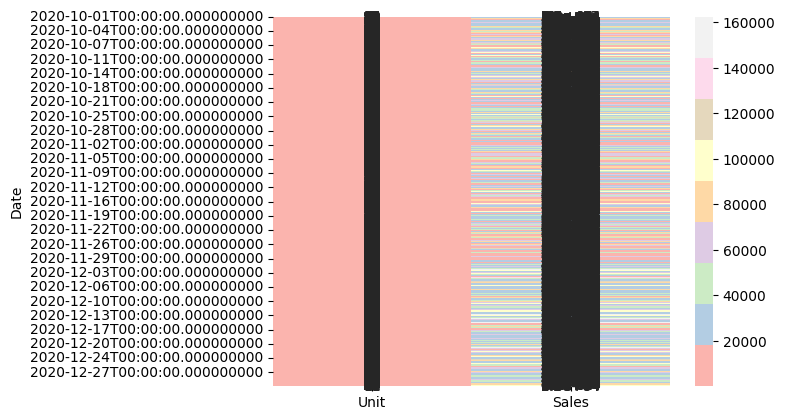

In [103]:
num_df = df.select_dtypes(include='number')
sns.heatmap(num_df, cmap='Pastel1', annot=True)
plt.show()

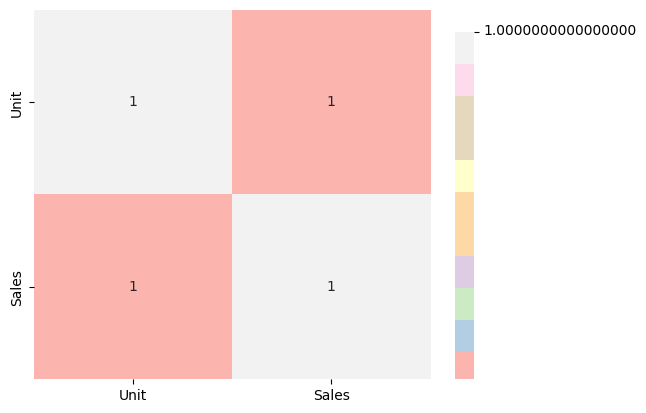

In [104]:
sns.heatmap(num_df.corr(), cmap='Pastel1', annot=True)
plt.show()

In [105]:
time_Sales = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)
time_Sales

,Sales
Time,
Morning,114207500
Afternoon,114007500
Evening,112087500


/tmp/ipython-input-1633517437.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_Sales.index, y=time_Sales.values, palette='viridis')


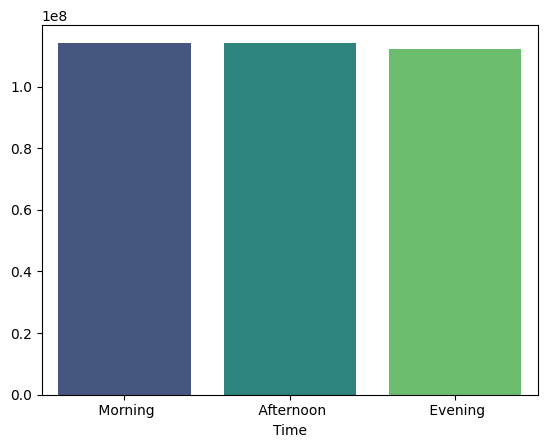

In [107]:
sns.barplot(x=time_Sales.index, y=time_Sales.values, palette='viridis')
plt.show()

/tmp/ipython-input-1462230667.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=time_Sales.index, y=time_Sales.values, palette='viridis')


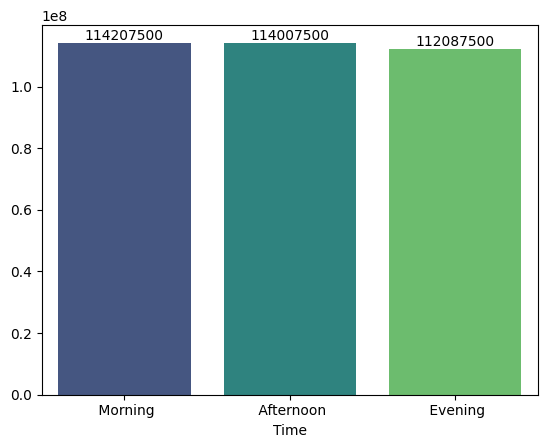

In [110]:
ax = sns.barplot(x=time_Sales.index, y=time_Sales.values, palette='viridis')
for i, v in enumerate(time_Sales.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

          Time     Group     Sales
0    Afternoon      Kids  28502500
1    Afternoon       Men  28767500
2    Afternoon   Seniors  28195000
3    Afternoon     Women  28542500
4      Evening      Kids  28052500
5      Evening       Men  28222500
6      Evening   Seniors  27267500
7      Evening     Women  28545000
8      Morning      Kids  28517500
9      Morning       Men  28760000
10     Morning   Seniors  28575000
11     Morning     Women  28355000


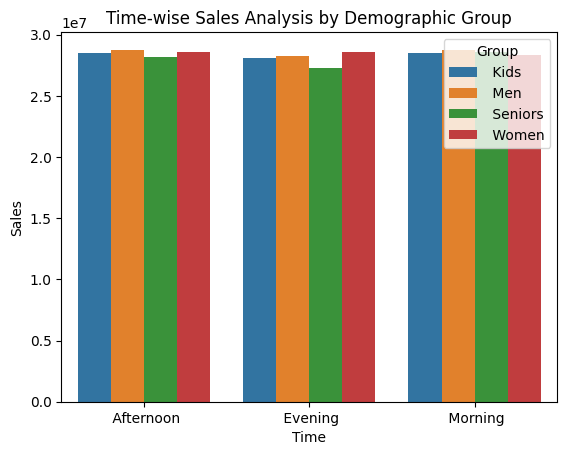

In [111]:
time_summary_final = df.groupby(['Time', 'Group'])['Sales'].sum().reset_index()
print(time_summary_final)

sns.barplot(x='Time', y='Sales', hue='Group', data=time_summary_final, estimator=sum)
plt.title('Time-wise Sales Analysis by Demographic Group')
plt.legend(title='Group')
plt.show()

In [112]:
df.columns

Index(['Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [113]:
pd.crosstab(df['State'], df['Group'], values=df['Sales'], aggfunc='sum')

Group,Kids,Men,Seniors,Women
State,,,,
NSW,18587500,19022500,18187500,19172500
NT,5700000,5762500,5465000,5652500
QLD,8510000,8392500,8190000,8325000
SA,14515000,14655000,14717500,14970000
TAS,5775000,5757500,5650000,5577500
VIC,26360000,26407500,26315000,26482500
WA,5625000,5752500,5512500,5262500


In [118]:
pd.options.display.float_format = '{:,.0f}'.format


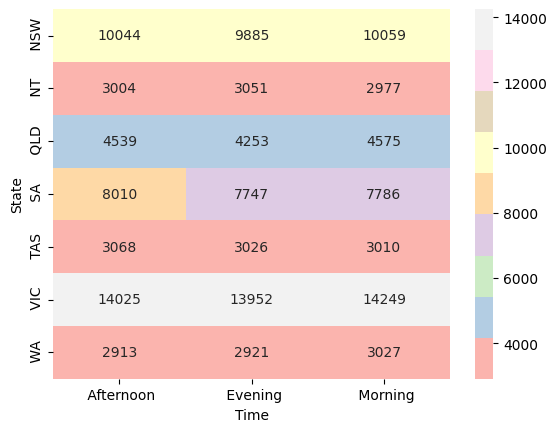

In [121]:
ct1 = pd.crosstab(df['State'], df['Time'], values=df['Unit'], aggfunc='sum')
# ct1 = ct1.applymap(lambda x: f"{x:,.0f}") # Removed this line
sns.heatmap(ct1, cmap='Pastel1', annot=True, fmt='d') # Added fmt='d' to display integers
plt.show()